# Assignment: User Behavior, Cooking Preferences, and Order Trends Analysis


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_excel('Assignment.xlsx')
df

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9
5,U006,Frank Green,25,Austin,2023-06-15,888-777-6666,frank@email.com,Dinner,7
6,U007,Grace King,38,Boston,2023-07-02,999-888-7777,grace@email.com,Breakfast,14
7,U008,Henry Lee,31,Miami,2023-08-11,101-202-3030,henry@email.com,Dinner,5
8,U009,Irene Moore,33,Dallas,2023-09-01,202-303-4040,irene@email.com,Lunch,6
9,U010,Jack White,29,Phoenix,2023-10-10,303-404-5050,jack@email.com,Dinner,8


In [51]:
user_details = pd.read_excel('Assignment.xlsx', sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel('Assignment.xlsx', sheet_name='CookingSessions.csv')
order_details = pd.read_excel('Assignment.xlsx', sheet_name='OrderDetails.csv')


In [197]:
user_details.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [55]:
cooking_sessions.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [57]:
order_details.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


# 1.Data Cleaning

In [193]:
user_details.dropna()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9
5,U006,Frank Green,25,Austin,2023-06-15,888-777-6666,frank@email.com,Dinner,7
6,U007,Grace King,38,Boston,2023-07-02,999-888-7777,grace@email.com,Breakfast,14
7,U008,Henry Lee,31,Miami,2023-08-11,101-202-3030,henry@email.com,Dinner,5
8,U009,Irene Moore,33,Dallas,2023-09-01,202-303-4040,irene@email.com,Lunch,6
9,U010,Jack White,29,Phoenix,2023-10-10,303-404-5050,jack@email.com,Dinner,8


In [62]:
cooking_sessions.dropna()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1


In [64]:
order_details.dropna()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005
5,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0,S006
6,1007,U005,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.0,S007
8,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
9,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0,S010
10,1011,U003,2024-12-06,Breakfast,Pancakes,Completed,8.5,Morning,4.0,S011
11,1012,U004,2024-12-06,Dinner,Spaghetti,Completed,12.5,Night,4.0,S012


# 2.Merging Data

In [105]:
merged_data = pd.merge(order_details, cooking_sessions, on='User ID', how='inner')
merged_data = pd.merge(merged_data, user_details, on='User ID', how='inner')


In [107]:
merged_data.columns

Index(['Order ID', 'User ID', 'Order Date', 'Meal Type_x', 'Dish Name_x',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID_x',
       'Session ID_y', 'Dish Name_y', 'Meal Type_y', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating', 'User Name', 'Age',
       'Location', 'Registration Date', 'Phone', 'Email', 'Favorite Meal',
       'Total Orders'],
      dtype='object')

# 3.Analyzing the Data #
## Relationship Between Cooking Activity and User Orders

To analyze the relationship between cooking sessions and user orders, we can investigate how user activity during cooking sessions impacts their order behavior. This can include metrics like the frequency of cooking sessions per user, the number of orders placed per session, and trends or patterns in ordering behavior after cooking sessions.

#### Steps for Analysis
1). Calculate Orders Per Cooking Session
        Group the data by SessionID and count the number of OrderID associated with each session.
        
2). Investigate User Engagement
        Analyze how frequently users participate in cooking sessions and how that relates to the number of orders they place.
        
3). Analyze Time Gap
        Check if there’s a time-based relationship.
        
4). Visualize the Correlation
        Create visualizations such as scatter plots or bar charts to show the relationship.


In [164]:
# Orders per session

orders_per_session = merged_data.groupby('Session ID_x')['Order ID'].count()
print("Orders per Cooking Session:")

print(orders_per_session.describe())

Orders per Cooking Session:
count    16.000000
mean      2.375000
std       0.806226
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       3.000000
Name: Order ID, dtype: float64


In [172]:
# User Engagement

user_engagement = merged_data.groupby('User ID').agg(
    total_sessions=('Session ID_x', 'nunique'),
    total_orders=('Order ID', 'nunique')
)
user_engagement['orders_per_session'] = user_engagement['total_orders'] / user_engagement['total_sessions']
print("User Engagement Summary:")
print(user_engagement.describe())

User Engagement Summary:
       total_sessions  total_orders  orders_per_session
count         8.00000       8.00000                 8.0
mean          2.00000       2.00000                 1.0
std           0.92582       0.92582                 0.0
min           1.00000       1.00000                 1.0
25%           1.00000       1.00000                 1.0
50%           2.00000       2.00000                 1.0
75%           3.00000       3.00000                 1.0
max           3.00000       3.00000                 1.0


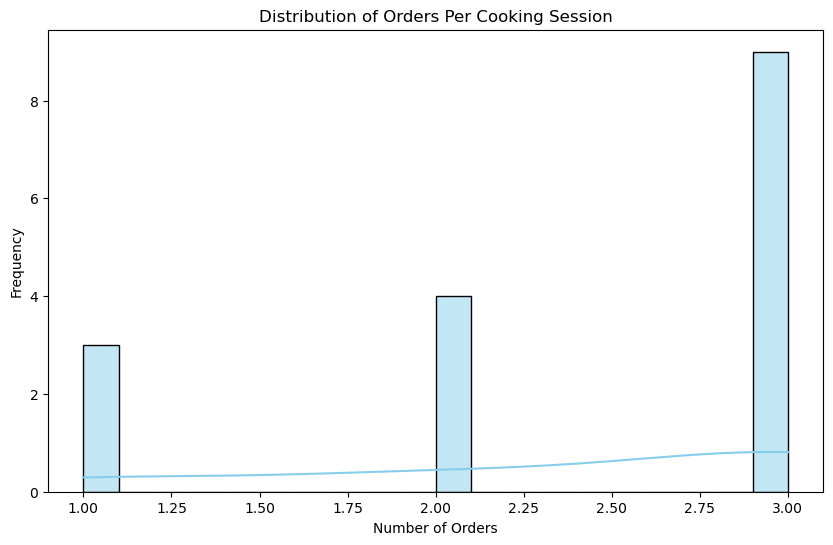

In [174]:
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_session, bins=20, kde=True, color='skyblue')
plt.title("Distribution of Orders Per Cooking Session")
plt.xlabel("Number of Orders")
plt.ylabel("Frequency")
plt.show()

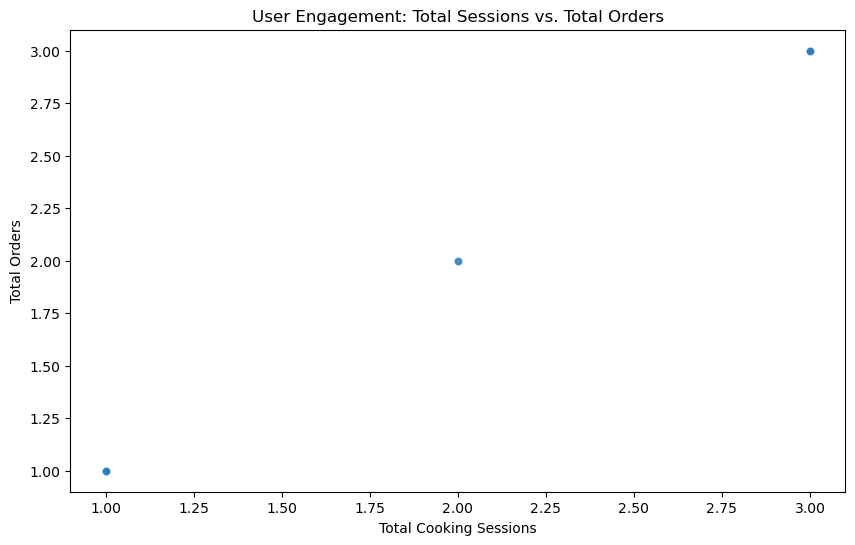

In [176]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_engagement, x='total_sessions', y='total_orders', alpha=0.6)
plt.title("User Engagement: Total Sessions vs. Total Orders")
plt.xlabel("Total Cooking Sessions")
plt.ylabel("Total Orders")
plt.show()


## Popular Dishes

In [119]:
# identifying popular dishes

In [117]:
popular_dishes = order_details['Dish Name'].value_counts()
print("Most Popular Dishes:")
print(popular_dishes)

Most Popular Dishes:
Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


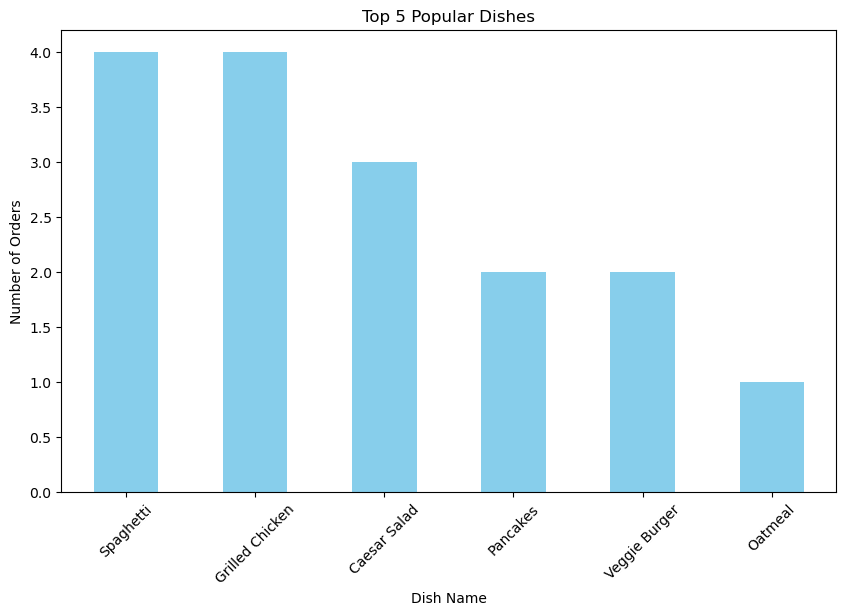

In [239]:
plt.figure(figsize=(10, 6))
popular_dishes.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 5 Popular Dishes")
plt.xlabel("Dish Name")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

# Insights

## Demographic Trend

In [203]:
#Exploring Demographic Factors Influencing User Behavior
print("Age Distribution:")
print(user_details['Age'].describe())

print("Location Distribution:")
print(user_details['Location'].value_counts())

Age Distribution:
count    10.000000
mean     31.800000
std       5.266245
min      25.000000
25%      28.250000
50%      30.500000
75%      34.500000
max      42.000000
Name: Age, dtype: float64
Location Distribution:
Location
New York         1
Los Angeles      1
Chicago          1
San Francisco    1
Seattle          1
Austin           1
Boston           1
Miami            1
Dallas           1
Phoenix          1
Name: count, dtype: int64


In [233]:
# Define bins and labels for age groups
age_bins = [18, 24, 34, 44, 54, 64, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column for age groups
merged_data['AgeGroup'] = pd.cut(merged_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by AgeGroup and calculate metrics
age_group_data = merged_data.groupby('AgeGroup').agg(
    total_sessions=('Session ID_x', 'nunique'),
    total_orders=('Order ID', 'nunique'),
    avg_orders_per_session=('Order ID', lambda x: x.count() / merged_data['Session ID_x'].nunique())
)

print("\nBehavior by Age Group:")
print(age_group_data)



Behavior by Age Group:
          total_sessions  total_orders  avg_orders_per_session
AgeGroup                                                      
18-24                  0             0                  0.0000
25-34                  9             9                  1.1875
35-44                  7             7                  1.1875
45-54                  0             0                  0.0000
55-64                  0             0                  0.0000
65+                    0             0                  0.0000


C:\Users\prathap\AppData\Local\Temp\ipykernel_3236\2706357613.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_data = merged_data.groupby('AgeGroup').agg(


In [127]:
# Orders By Age
age_vs_orders = merged_data.groupby('Age')['Order ID'].count()
print("Orders by Age:")
print(age_vs_orders)

Orders by Age:
Age
25    1
27    4
28    9
30    4
31    1
35    9
38    1
42    9
Name: Order ID, dtype: int64


C:\Users\prathap\AppData\Local\Temp\ipykernel_3236\3177682841.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_vs_orders.index, y=age_vs_orders.values, palette='viridis')


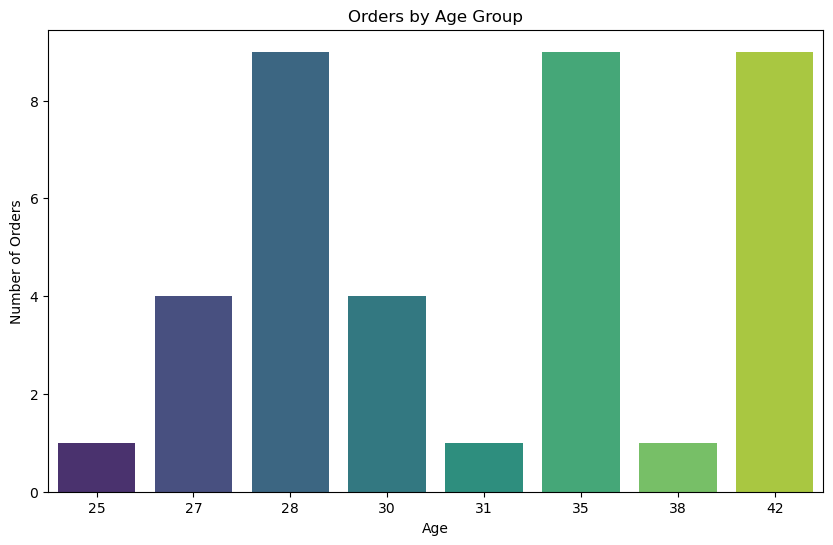

In [135]:
# Visualization: Orders by Age
plt.figure(figsize=(10, 6))
sns.barplot(x=age_vs_orders.index, y=age_vs_orders.values, palette='viridis')
plt.title("Orders by Age Group")
plt.xlabel("Age")
plt.ylabel("Number of Orders")
plt.show()

In [235]:
# Analyzing behaviour by Location

location_data = merged_data.groupby('Location').agg(
    total_sessions=('Session ID_x', 'nunique'),
    total_orders=('Order ID', 'nunique')
).sort_values(by='total_orders', ascending=False)
print("\nBehavior by Location:")
print(location_data)


Behavior by Location:
               total_sessions  total_orders
Location                                   
Chicago                     3             3
Los Angeles                 3             3
New York                    3             3
San Francisco               2             2
Seattle                     2             2
Austin                      1             1
Boston                      1             1
Miami                       1             1


C:\Users\prathap\AppData\Local\Temp\ipykernel_3236\1109797164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_data.index, y=location_data['total_orders'], palette='viridis')


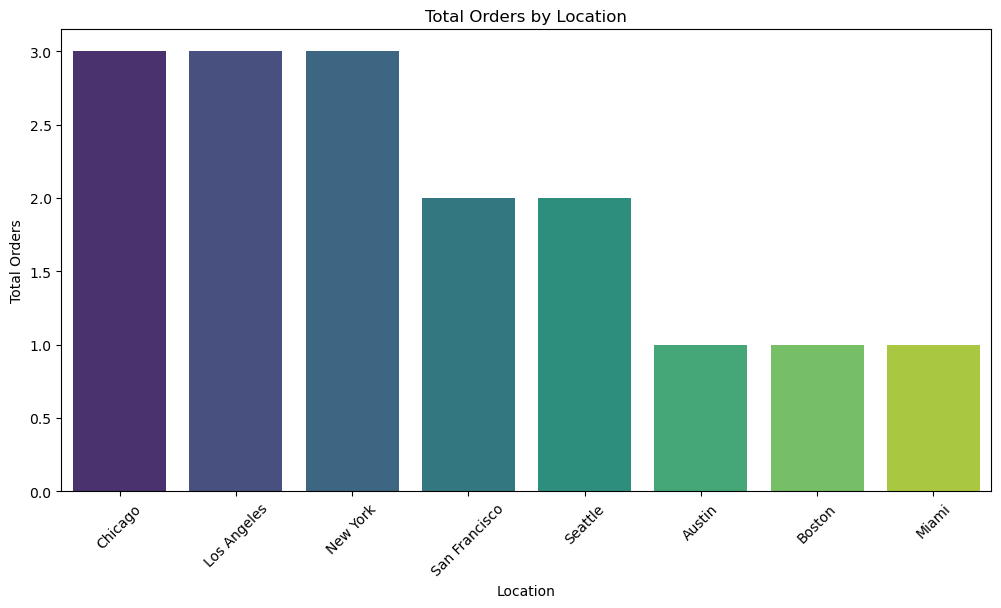

In [237]:
# Visualization

plt.figure(figsize=(12, 6))
sns.barplot(x=location_data.index, y=location_data['total_orders'], palette='viridis')
plt.title("Total Orders by Location")
plt.xlabel("Location")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.show()